# Week 3 Lab: Building a Simple Neural Network with PyTorch

### Objective: 
- Build a basic neural network from scratch using PyTorch.
- Train it on the MNIST dataset to recognize handwritten digits.

### Step 1: Install Necessary Libraries

In [1]:
!pip install torch torchvision matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\piaka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Step 2: Import Libraries

In [2]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### Step 3: Load and Preprocess the MNIST Dataset

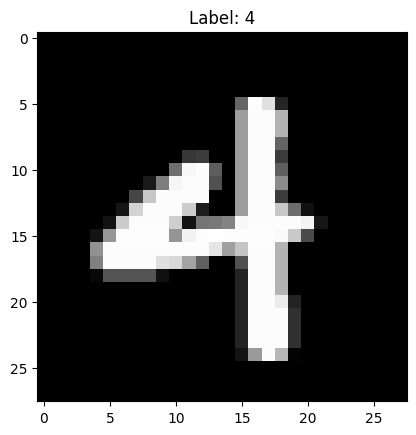

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load training data
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# Create DataLoader objects
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Visualize a sample image
images, labels = next(iter(train_loader))
plt.imshow(images[0].view(28, 28), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

### Step 4: Define the Neural Network Model

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Step 5: Define Loss Function and Optimizer

In [5]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Step 6: Train the Neural Network

In [6]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/5, Loss: 1.0640022833781964
Epoch 2/5, Loss: 0.3881210510029213
Epoch 3/5, Loss: 0.32959251452896643
Epoch 4/5, Loss: 0.2958978314453097
Epoch 5/5, Loss: 0.2701580968024189


### Step 7: Evaluate the Model

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Accuracy: 92.35%


### Step 8: Visualize the Results

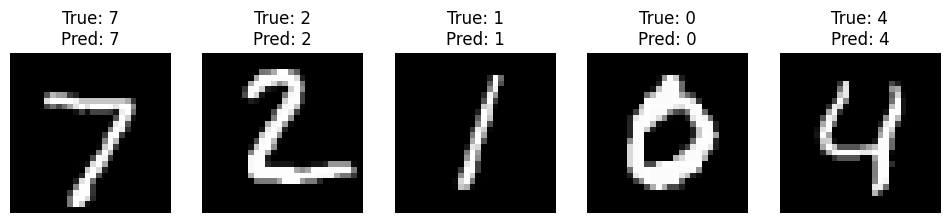

In [8]:
def plot_images(images, labels, preds):
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].view(28, 28), cmap='gray')
        ax.set_title(f"True: {labels[i]}\nPred: {preds[i]}")
        ax.axis('off')

# Get some test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get predictions
outputs = model(images)
_, preds = torch.max(outputs, 1)

plot_images(images, labels, preds)


## Additional Exercises:

### Exercise 1: Experiment with Network Architecture
- Try adding more hidden layers or changing the number of nodes in each layer.
- How does this impact the model's performance?

In [9]:
class ModifiedNN(nn.Module):
    def __init__(self):
        super(ModifiedNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Create the modified model and train it again
model = ModifiedNN()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Exercise 2: Change the Learning Rate
- Adjust the learning rate in the optimizer.
- Observe how this affects the speed of training and the final accuracy.

In [10]:
# Change the learning rate to 0.05 and re-train the model
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

### Exercise 3: Use a Different Optimizer
- Try using Adam instead of SGD as the optimizer.
- Does this improve the performance of the network?

In [11]:
# Switch to Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)